In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
data = pd.read_csv('D:/DEEP/Report.csv')

In [4]:
data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [5]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [6]:
data = data[data_columns].copy()

In [7]:
happy_df = data.rename(columns={'Country name':'country_name', 'Regional indicator':'regional_indicator', 'Ladder score':'happiness_score', 'Log GDP per capita':'gdp_per_capita','Social support':'social_support', 'Healthy life expectancy':'healthy_life_expectancy', 'Freedom to make life choices':'freedom_to_make_life_choices', 'Generosity':'generosity', 'Perceptions of corruption':'perceptions_of_corruption'})

In [8]:
happy_df.head()

,country_name,regional_indicator,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [9]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
gdp_per_capita                  3
social_support                  3
healthy_life_expectancy         3
freedom_to_make_life_choices    3
generosity                      3
perceptions_of_corruption       3
dtype: int64

In [10]:
happy_df.fillna(0,inplace=True)

In [11]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'GDP per capita')

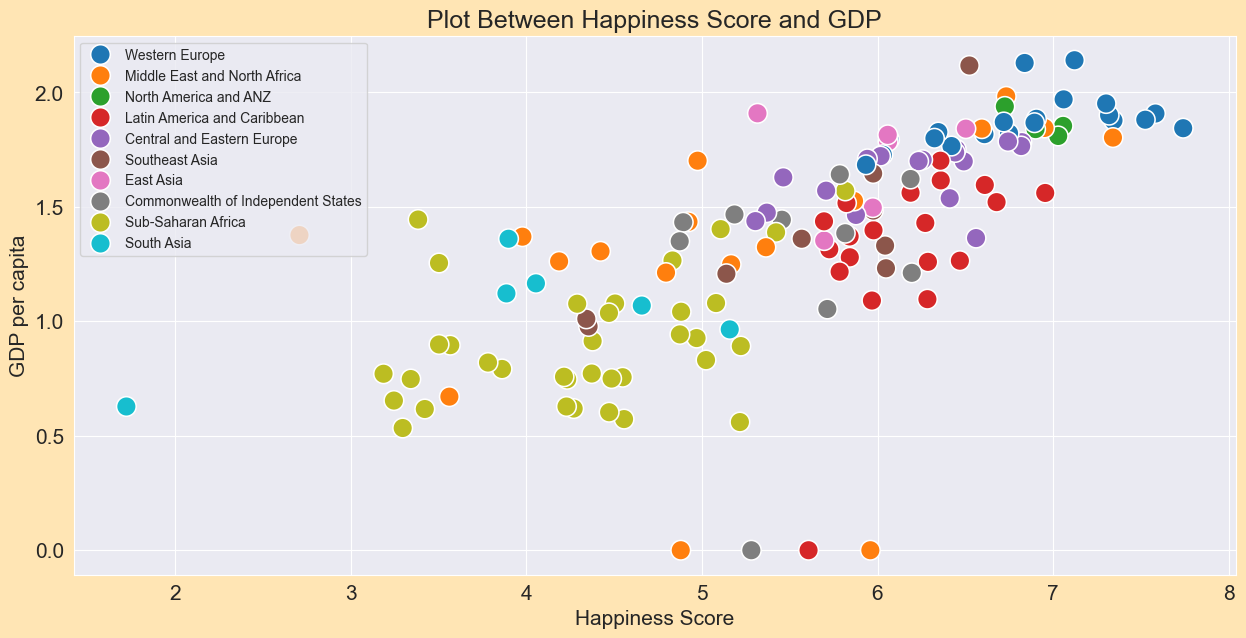

In [12]:
# plot between happiness and GDP

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot Between Happiness Score and GDP')
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.gdp_per_capita, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [13]:
gdp_region = happy_df.groupby('regional_indicator')['gdp_per_capita'].sum()
print(gdp_region)

regional_indicator
Central and Eastern Europe            27.842
Commonwealth of Independent States    12.609
East Asia                             10.202
Latin America and Caribbean           25.236
Middle East and North Africa          21.908
North America and ANZ                  7.443
South Asia                             6.311
Southeast Asia                        12.369
Sub-Saharan Africa                    31.646
Western Europe                        37.467
Name: gdp_per_capita, dtype: float64


Text(0, 0.5, '')

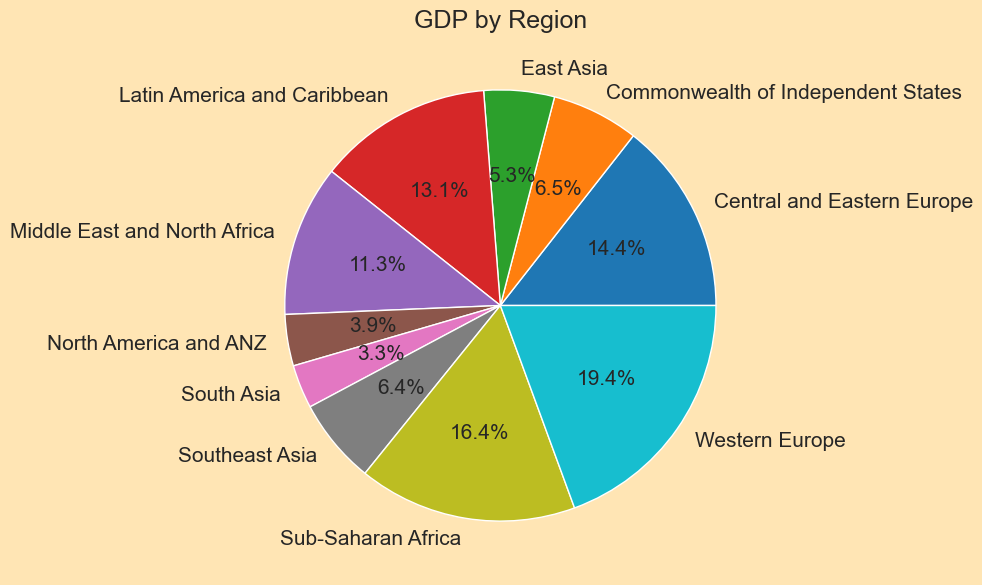

In [14]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [15]:
# Total countries by region

total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            10
East Asia                                      6
Latin America and Caribbean                   19
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     6
Southeast Asia                                 9
Sub-Saharan Africa                            35
Western Europe                                20


Text(0.5, 1.0, 'Correlation Map')

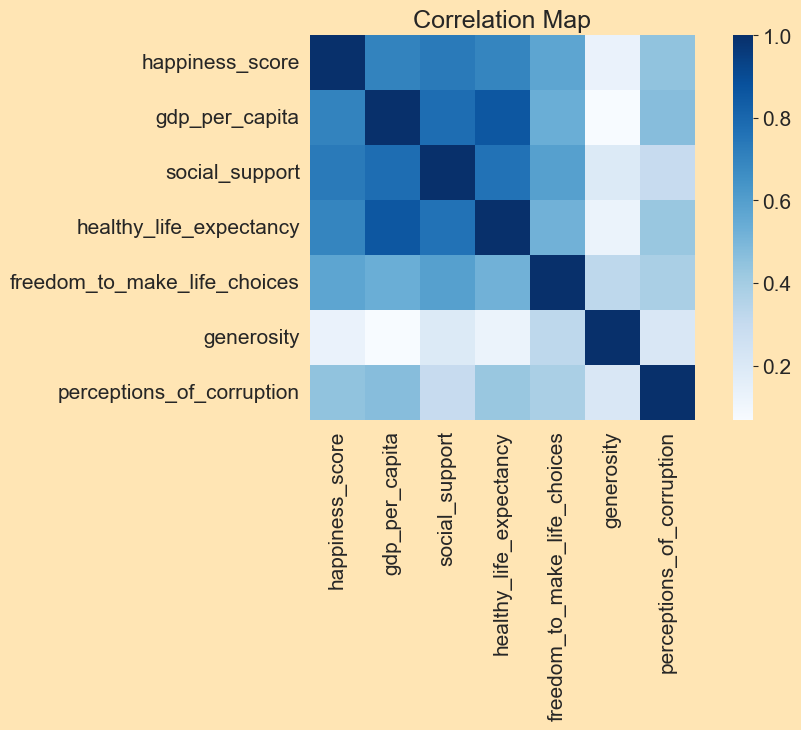

In [16]:
# Correlation Map

cor = happy_df.select_dtypes(include=[np.number]).corr(method="pearson")

plt.figure(figsize=(10, 5))
sns.heatmap(cor, cmap="Blues", square=True)
plt.title("Correlation Map")

In [17]:
# Corruption per region

corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
print(corruption)


                                    perceptions_of_corruption
regional_indicator                                           
Central and Eastern Europe                           0.089353
Commonwealth of Independent States                   0.110100
East Asia                                            0.200000
Latin America and Caribbean                          0.109211
Middle East and North Africa                         0.128882
North America and ANZ                                0.335000
South Asia                                           0.099500
Southeast Asia                                       0.164556
Sub-Saharan Africa                                   0.111429
Western Europe                                       0.308650


<BarContainer object of 10 artists>

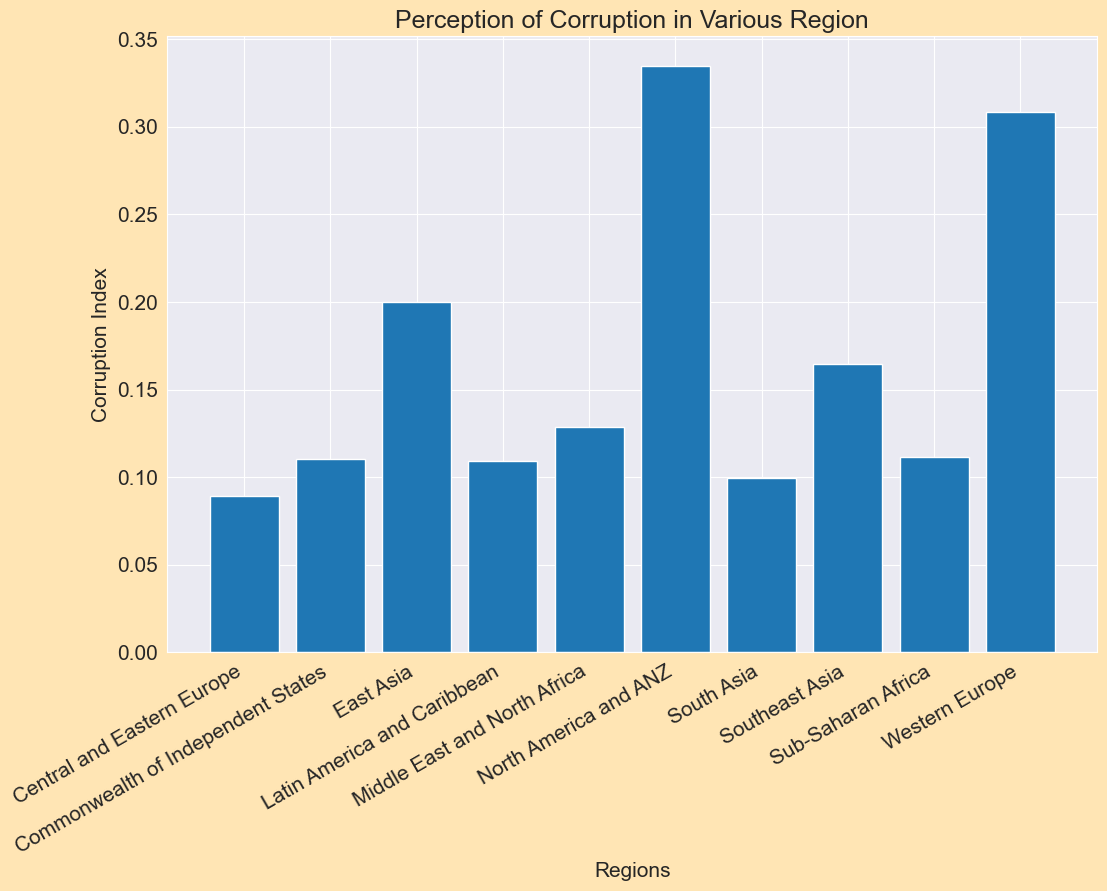

In [18]:
plt.rcParams['figure.figsize']=(12, 8)
plt.title('Perception of Corruption in Various Region')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation = 30,ha='right')
plt.bar(corruption.index,corruption.perceptions_of_corruption)

Text(0, 0.5, 'Happiness Scores')

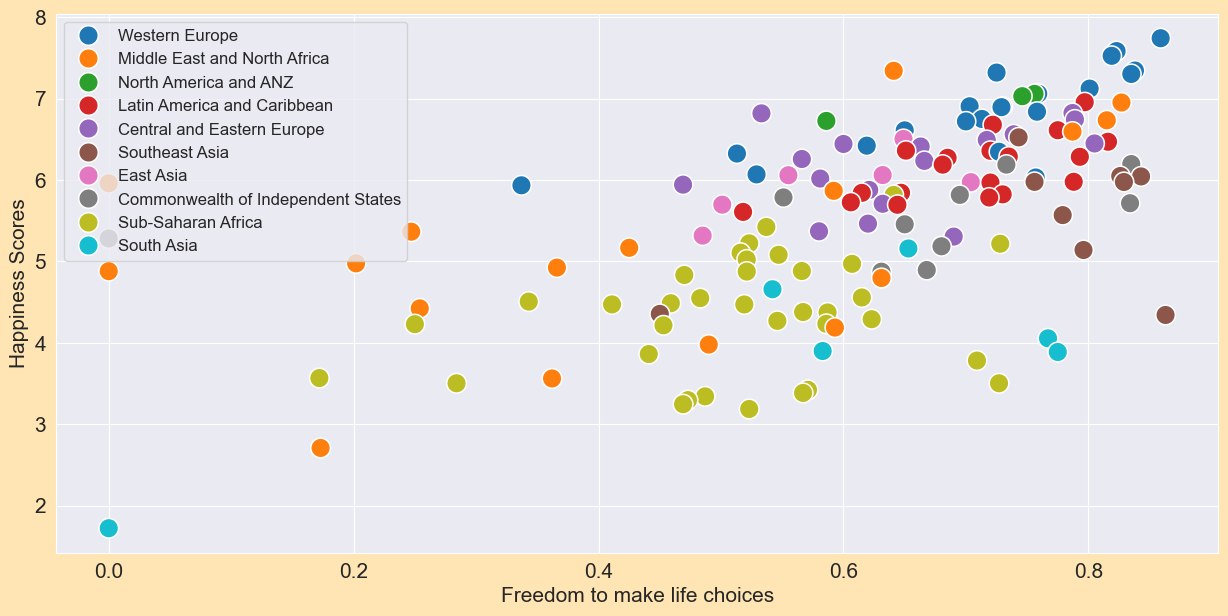

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x=happy_df.freedom_to_make_life_choices, y=happy_df.happiness_score, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='upper left', fontsize = '12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Scores')